In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import pandas as pd

import bacco
import baccoemu
from bacco.cosmo_parameters import TheOne as TheOne_dict
from bacco.cosmo_parameters import nenya_s8 as Nenya_dict

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import utils
import plotter
# import data_creation_pipeline as dcp
# import compute_biased_pks_fields as cpk

%load_ext autoreload
%autoreload 2

2024-08-06 13:07:10.823532: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 13:07:11.066041: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 13:07:11.067916: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 13:07:14.626027: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-08-06 13:07:20.051774: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gp

### Load in emu

In [3]:
emu, emu_bounds, emu_param_names = utils.load_emu()
emu_bounds_dict = dict(zip(emu_param_names, emu_bounds))

Loading l-bias lpt emulator...


/dipc/kstoreyf/.conda/envs/bacemuenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/bacemuenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/bacemuenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 whe

L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


/dipc/kstoreyf/.conda/envs/bacemuenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/bacemuenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/bacemuenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.1.1

Nonlinear l-bias emulator loaded in memory.
HIIII


/dipc/kstoreyf/.conda/envs/bacemuenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Load in Quijote results

In [13]:
idx_LH_str = '0663'
sim_name_quijote = f'quijote_LH{idx_LH_str}'
tag_extra = ''
        
fn_pnn = f'../data/pnns/pnn_{sim_name_quijote}{tag_extra}.npy'
power_all_terms_quijote = np.load(fn_pnn, allow_pickle=True)
    
fn_pk_lag = f'../data/pks/pks_lagrangian_{sim_name_quijote}{tag_extra}.npy'
pk_objs_lag_quijote = np.load(fn_pk_lag, allow_pickle=True)  

In [5]:
dir_data = '/cosmos_storage/home/mpelle/Yin_data/Quijote'
fn_params = f'{dir_data}/LH{idx_LH_str}/param_{idx_LH_str}.txt'
param_vals = np.loadtxt(fn_params)
param_names = ['omega_m', 'omega_baryon', 'h', 'n_s', 'sigma_8']
param_dict = dict(zip(param_names, param_vals))
cosmo_quijote = utils.get_cosmo(param_dict)

Param tau not in param dict, adding quijote value
Param neutrino_mass not in param dict, adding quijote value
Param w0 not in param dict, adding quijote value
Param wa not in param dict, adding quijote value


In [6]:
kk = power_all_terms_quijote[0]['k']
i_k_emu = kk<0.75
kk_emu = kk[i_k_emu]

cosmo_params_emu_quijote = utils.cosmo_bacco_to_cosmo_baccoemu(cosmo_quijote)
_, pnn_emu_quijote = emu.get_nonlinear_pnn(k=kk_emu, **cosmo_params_emu_quijote)

from raw pos

In [55]:
idx_LH_str = '0663'
sim_name_quijote_posfromweb = f'quijote_LH{idx_LH_str}'
tag_extra = '_posfromweb'
        
fn_pnn = f'../data/pnns/pnn_{sim_name_quijote_posfromweb}{tag_extra}.npy'
power_all_terms_quijote_posfromweb = np.load(fn_pnn, allow_pickle=True)
    
fn_pk_lag = f'../data/pks/pks_lagrangian_{sim_name_quijote_posfromweb}{tag_extra}.npy'
pk_objs_lag_quijote_posfromweb = np.load(fn_pk_lag, allow_pickle=True)  

### Load in Bacco results

In [14]:
sim_name_bacco = 'TheOne_N1536_L512'
tag_extra = ''
        
fn_pnn = f'../data/pnns/pnn_{sim_name_bacco}{tag_extra}.npy'
power_all_terms_bacco = np.load(fn_pnn, allow_pickle=True)
    
fn_pk_lag = f'../data/pks/pks_lagrangian_{sim_name_bacco}{tag_extra}.npy'
pk_objs_lag_bacco = np.load(fn_pk_lag, allow_pickle=True)  

In [9]:
from bacco.cosmo_parameters import TheOne as TheOne_dict   

if sim_name=='TheOne_N1536_L512':
    basedir = "/cosmos_storage/cosmosims/MultiCosmology_N1536/power_N1536_L512.0_output/0.00"
snapnum_init = 0
halo_file_init = f"groups_{snapnum_init:03}/fof_subhalo_history_tab_orph_wweight_{snapnum_init:03}"
sim = bacco.Simulation(basedir=basedir, 
                    halo_file=halo_file_init,
                    )

expfactor_target = 1.0
diff = expfactor_target-sim.snaplist['a']
snapnum = sim.snaplist['snap'][np.argmin(diff[diff>0])]
expfactor = sim.snaplist['a'][np.argmin(diff[diff>0])]
print(snapnum, expfactor)
                                
cosmo_theone = bacco.Cosmology(**TheOne_dict, expfactor=expfactor)

2024-08-06 15:25:39,564 bacco.sims : Initialising simulation Default
2024-08-06 15:25:39,565 bacco.sims : try /cosmos_storage/cosmosims/MultiCosmology_N1536/power_N1536_L512.0_output/0.00/groups_000/fof_subhalo_history_tab_orph_wweight_000
2024-08-06 15:25:39,569 bacco.sims : Loading /cosmos_storage/cosmosims/MultiCosmology_N1536/power_N1536_L512.0_output/0.00/groups_000/fof_subhalo_history_tab_orph_wweight_000
2024-08-06 15:25:39,578 bacco.cosmo :    initialization took 0.000 secs
2024-08-06 15:25:39,641 bacco.sims : ...done in 0.0149 s
2024-08-06 15:25:39,642 bacco.cosmo :    initialization took 0.000 secs


47 0.983014


In [10]:
kk = power_all_terms_bacco[0]['k']
i_k_emu = kk<0.75
kk_emu = kk[i_k_emu]

cosmo_params_emu_theone = utils.cosmo_bacco_to_cosmo_baccoemu(cosmo_theone)
_, pnn_emu_theone = emu.get_nonlinear_pnn(k=kk_emu, **cosmo_params_emu_theone)

### Plot

/tmp/ipykernel_446993/830546194.py:41: RuntimeWarning: divide by zero encountered in divide
  axarr[1].plot(kk_emu, (pnn_emu[i_pnn]-pk_obj['pk'][i_k_emu])/pk_obj['pk'][i_k_emu],
/tmp/ipykernel_446993/830546194.py:44: RuntimeWarning: invalid value encountered in divide
  axarr[2].plot(kk, (pk_obj['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'],
/tmp/ipykernel_446993/830546194.py:59: RuntimeWarning: invalid value encountered in divide
  (pk_objs_lag[i_pnn_lag]['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'],


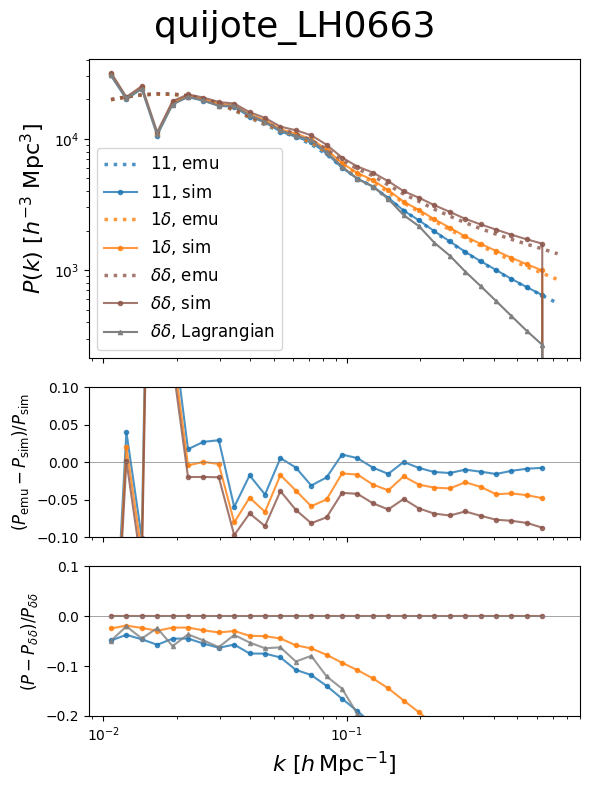

In [15]:
pnn_emu = pnn_emu_quijote
power_all_terms = power_all_terms_quijote
pk_objs_lag = pk_objs_lag_quijote
sim_name = sim_name_quijote + tag_extra

#####

nrows, ncols = 3, 1
fig, axarr = plt.subplots(nrows, ncols, figsize=(6,8), sharex=True, height_ratios=[2,1,1])
plt.subplots_adjust(hspace=0.01, wspace=0.01)
ax, ax1, ax2 = axarr
plt.suptitle(sim_name, fontsize=26)

alpha = 0.8

labels_pnn = utils.labels_pnn

color_pdd = 'C'+str(5)

k = kk
lw = 1.5
lw_emu = 2.5

i_pnn_compare = 5
pk_obj_compare = power_all_terms[i_pnn_compare]

is_pnn = [0,1,5]
for i_pnn in is_pnn:
    pk_obj = power_all_terms[i_pnn]
    # mask = pk_obj['pk'] > 0
    # kk_emu = kk_emu[mask]
    # kk = kk[mask]
    # pk = pk_obj['pk'][mask]
    color = 'C'+str(i_pnn)
    axarr[0].plot(kk_emu, pnn_emu[i_pnn], label=f'{labels_pnn[i_pnn]}, emu', 
                  ls=':', alpha=alpha, color=color, lw=lw_emu)
    axarr[0].plot(kk, pk_obj['pk'], 
                  ls='-', lw=lw, alpha=alpha, color=color,
                  marker='o', markersize=3, 
                  label=f'{labels_pnn[i_pnn]}, sim')
    axarr[1].plot(kk_emu, (pnn_emu[i_pnn]-pk_obj['pk'][i_k_emu])/pk_obj['pk'][i_k_emu], 
                  marker='o', markersize=3, 
                  ls='-', lw=lw, alpha=alpha, color=color)
    axarr[2].plot(kk, (pk_obj['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'], 
                  ls='-', lw=lw, 
                  marker='o', markersize=3, 
                  alpha=alpha, color=color)

import itertools
prod = np.array(list(itertools.combinations_with_replacement(np.arange(5), r=2)))
is_pnn_lag = [1]
for i_pnn_lag in is_pnn_lag:
    i_pnn_corresponding = np.where((prod==[i_pnn_lag,i_pnn_lag]).all(axis=1))[0][0]
    label = utils.labels_pnn[i_pnn_corresponding]+', Lagrangian'
    axarr[0].plot(pk_objs_lag[i_pnn_lag]['k'], pk_objs_lag[i_pnn_lag]['pk'], 
                  marker='^', markersize=3, 
                  label=label, color='grey')
    axarr[2].plot(pk_objs_lag[i_pnn_lag]['k'], 
                  (pk_objs_lag[i_pnn_lag]['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'], 
                  marker='^', markersize=3, 
                  ls='-', alpha=alpha, color='grey', lw=lw)

# axarr[0].plot(pk_sdm['k'], pk_sdm['pk'], 
#            marker='d', markersize=3, 
#            color='k', alpha=alpha, ls='-.',lw=lw, label='P(k), SDM particles')
# axarr[2].plot(pk_sdm['k'],
#             (pk_sdm['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'], 
#              marker='d', markersize=3, 
#              alpha=alpha, color='black',  ls='-.', lw=lw)

ax1.axhline(0.0, color='grey', lw=0.5)
ax2.axhline(0.0, color='grey', lw=0.5)

axarr[-1].set_xlabel(r'$k \,\, [h\,{\rm Mpc}^{-1}]$', fontsize=16)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=16)
axarr[1].set_ylabel(r'$(P_\text{emu}-P_\text{sim})/P_\text{sim}$', fontsize=12)
lcomp = utils.labels_pnn[i_pnn_compare].split('$')[1]
#axarr[1].set_ylabel(rf'$(P-P_\text{{{lcomp}}})/P_\text{sim}$', fontsize=12)
#axarr[2].set_ylabel(rf'$(P-P_\text{lcomp})/P_\text{{lcomp}}$', fontsize=12)
axarr[2].set_ylabel(rf'$(P-P_{{{lcomp}}})/P_{{{lcomp}}}$', fontsize=12)
#ax.set_xlim(k_min, k_max)
#ax.set_ylim(3e2, 5e4)
#ax.set_ylim(1e3, 5e5)

ax1.set_ylim(-0.1, 0.1)
ax2.set_ylim(-0.2, 0.1)

ax.legend(fontsize=12, loc='lower left')

ax.set_xscale('log')
ax.set_yscale('log')

mpl.pyplot.tight_layout()
# mpl.pyplot.show()

# if save_plots:
#     print(f'Saving {plot_dir}/quijote_LH{indicesLH[i]}_pnnzooom{tag_save}.png')
#     plt.savefig(f'{plot_dir}/quijote_LH{indicesLH[i]}_pnnzooom{tag_save}.png', bbox_inches='tight')b

/tmp/ipykernel_446993/469888084.py:41: RuntimeWarning: divide by zero encountered in divide
  axarr[1].plot(kk_emu, (pnn_emu[i_pnn]-pk_obj['pk'][i_k_emu])/pk_obj['pk'][i_k_emu],
/tmp/ipykernel_446993/469888084.py:44: RuntimeWarning: invalid value encountered in divide
  axarr[2].plot(kk, (pk_obj['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'],
/tmp/ipykernel_446993/469888084.py:59: RuntimeWarning: invalid value encountered in divide
  (pk_objs_lag[i_pnn_lag]['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'],


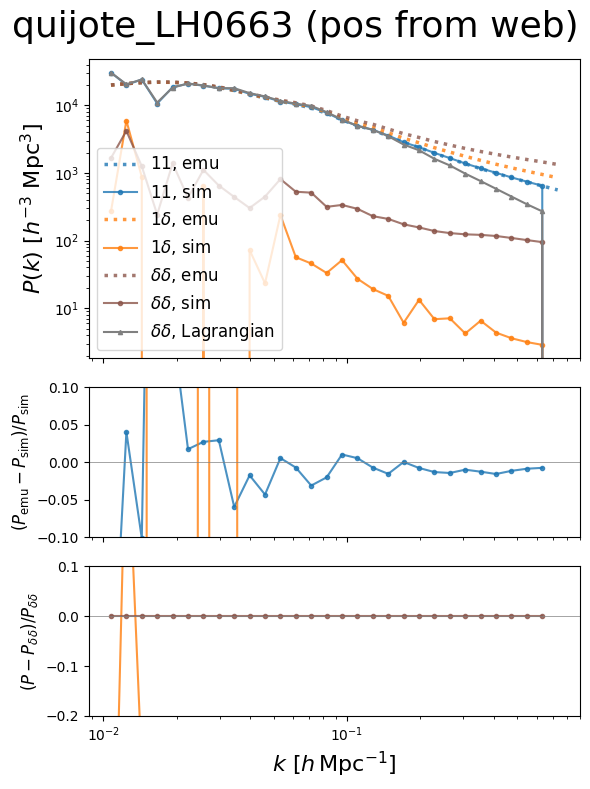

In [56]:
pnn_emu = pnn_emu_quijote
power_all_terms = power_all_terms_quijote_posfromweb
pk_objs_lag = pk_objs_lag_quijote_posfromweb
sim_name = sim_name_quijote + ' (pos from web)'

#####

nrows, ncols = 3, 1
fig, axarr = plt.subplots(nrows, ncols, figsize=(6,8), sharex=True, height_ratios=[2,1,1])
plt.subplots_adjust(hspace=0.01, wspace=0.01)
ax, ax1, ax2 = axarr
plt.suptitle(sim_name, fontsize=26)

alpha = 0.8

labels_pnn = utils.labels_pnn

color_pdd = 'C'+str(5)

k = kk
lw = 1.5
lw_emu = 2.5

i_pnn_compare = 5
pk_obj_compare = power_all_terms[i_pnn_compare]

is_pnn = [0,1,5]
for i_pnn in is_pnn:
    pk_obj = power_all_terms[i_pnn]
    # mask = pk_obj['pk'] > 0
    # kk_emu = kk_emu[mask]
    # kk = kk[mask]
    # pk = pk_obj['pk'][mask]
    color = 'C'+str(i_pnn)
    axarr[0].plot(kk_emu, pnn_emu[i_pnn], label=f'{labels_pnn[i_pnn]}, emu', 
                  ls=':', alpha=alpha, color=color, lw=lw_emu)
    axarr[0].plot(kk, pk_obj['pk'], 
                  ls='-', lw=lw, alpha=alpha, color=color,
                  marker='o', markersize=3, 
                  label=f'{labels_pnn[i_pnn]}, sim')
    axarr[1].plot(kk_emu, (pnn_emu[i_pnn]-pk_obj['pk'][i_k_emu])/pk_obj['pk'][i_k_emu], 
                  marker='o', markersize=3, 
                  ls='-', lw=lw, alpha=alpha, color=color)
    axarr[2].plot(kk, (pk_obj['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'], 
                  ls='-', lw=lw, 
                  marker='o', markersize=3, 
                  alpha=alpha, color=color)

import itertools
prod = np.array(list(itertools.combinations_with_replacement(np.arange(5), r=2)))
is_pnn_lag = [1]
for i_pnn_lag in is_pnn_lag:
    i_pnn_corresponding = np.where((prod==[i_pnn_lag,i_pnn_lag]).all(axis=1))[0][0]
    label = utils.labels_pnn[i_pnn_corresponding]+', Lagrangian'
    axarr[0].plot(pk_objs_lag[i_pnn_lag]['k'], pk_objs_lag[i_pnn_lag]['pk'], 
                  marker='^', markersize=3, 
                  label=label, color='grey')
    axarr[2].plot(pk_objs_lag[i_pnn_lag]['k'], 
                  (pk_objs_lag[i_pnn_lag]['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'], 
                  marker='^', markersize=3, 
                  ls='-', alpha=alpha, color='grey', lw=lw)

# axarr[0].plot(pk_sdm['k'], pk_sdm['pk'], 
#            marker='d', markersize=3, 
#            color='k', alpha=alpha, ls='-.',lw=lw, label='P(k), SDM particles')
# axarr[2].plot(pk_sdm['k'],
#             (pk_sdm['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'], 
#              marker='d', markersize=3, 
#              alpha=alpha, color='black',  ls='-.', lw=lw)

ax1.axhline(0.0, color='grey', lw=0.5)
ax2.axhline(0.0, color='grey', lw=0.5)

axarr[-1].set_xlabel(r'$k \,\, [h\,{\rm Mpc}^{-1}]$', fontsize=16)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=16)
axarr[1].set_ylabel(r'$(P_\text{emu}-P_\text{sim})/P_\text{sim}$', fontsize=12)
lcomp = utils.labels_pnn[i_pnn_compare].split('$')[1]
#axarr[1].set_ylabel(rf'$(P-P_\text{{{lcomp}}})/P_\text{sim}$', fontsize=12)
#axarr[2].set_ylabel(rf'$(P-P_\text{lcomp})/P_\text{{lcomp}}$', fontsize=12)
axarr[2].set_ylabel(rf'$(P-P_{{{lcomp}}})/P_{{{lcomp}}}$', fontsize=12)
#ax.set_xlim(k_min, k_max)
#ax.set_ylim(3e2, 5e4)
#ax.set_ylim(1e3, 5e5)

ax1.set_ylim(-0.1, 0.1)
ax2.set_ylim(-0.2, 0.1)

ax.legend(fontsize=12, loc='lower left')

ax.set_xscale('log')
ax.set_yscale('log')

mpl.pyplot.tight_layout()
# mpl.pyplot.show()

# if save_plots:
#     print(f'Saving {plot_dir}/quijote_LH{indicesLH[i]}_pnnzooom{tag_save}.png')
#     plt.savefig(f'{plot_dir}/quijote_LH{indicesLH[i]}_pnnzooom{tag_save}.png', bbox_inches='tight')

/tmp/ipykernel_446993/1745954031.py:41: RuntimeWarning: divide by zero encountered in divide
  axarr[1].plot(kk_emu, (pnn_emu[i_pnn]-pk_obj['pk'][i_k_emu])/pk_obj['pk'][i_k_emu],
/tmp/ipykernel_446993/1745954031.py:44: RuntimeWarning: invalid value encountered in divide
  axarr[2].plot(kk, (pk_obj['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'],
/tmp/ipykernel_446993/1745954031.py:59: RuntimeWarning: invalid value encountered in divide
  (pk_objs_lag[i_pnn_lag]['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'],


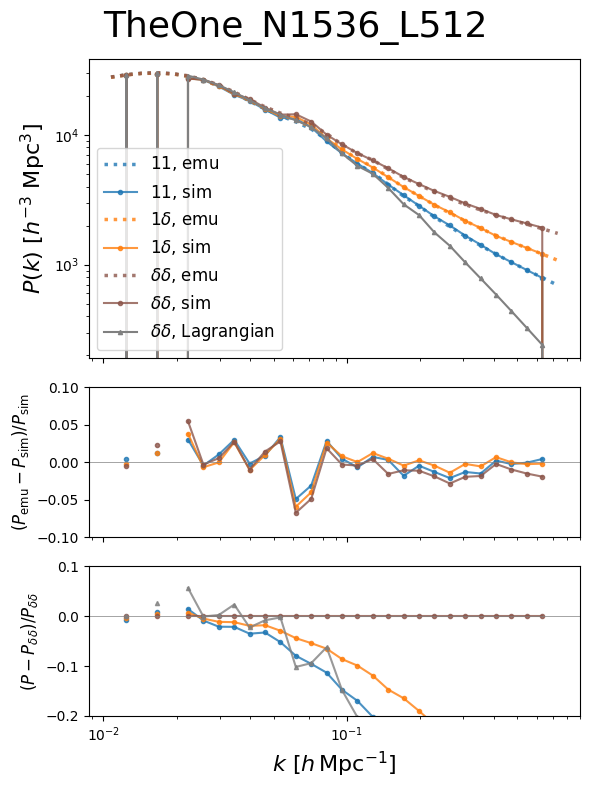

In [17]:
pnn_emu = pnn_emu_theone
power_all_terms = power_all_terms_bacco
pk_objs_lag = pk_objs_lag_bacco
sim_name = sim_name_bacco

#####

nrows, ncols = 3, 1
fig, axarr = plt.subplots(nrows, ncols, figsize=(6,8), sharex=True, height_ratios=[2,1,1])
plt.subplots_adjust(hspace=0.01, wspace=0.01)
ax, ax1, ax2 = axarr
plt.suptitle(sim_name, fontsize=26)

alpha = 0.8

labels_pnn = utils.labels_pnn

color_pdd = 'C'+str(5)

k = kk
lw = 1.5
lw_emu = 2.5

i_pnn_compare = 5
pk_obj_compare = power_all_terms[i_pnn_compare]

is_pnn = [0,1,5]
for i_pnn in is_pnn:
    pk_obj = power_all_terms[i_pnn]
    # mask = pk_obj['pk'] > 0
    # kk_emu = kk_emu[mask]
    # kk = kk[mask]
    # pk = pk_obj['pk'][mask]
    color = 'C'+str(i_pnn)
    axarr[0].plot(kk_emu, pnn_emu[i_pnn], label=f'{labels_pnn[i_pnn]}, emu', 
                  ls=':', alpha=alpha, color=color, lw=lw_emu)
    axarr[0].plot(kk, pk_obj['pk'], 
                  ls='-', lw=lw, alpha=alpha, color=color,
                  marker='o', markersize=3, 
                  label=f'{labels_pnn[i_pnn]}, sim')
    axarr[1].plot(kk_emu, (pnn_emu[i_pnn]-pk_obj['pk'][i_k_emu])/pk_obj['pk'][i_k_emu], 
                  marker='o', markersize=3, 
                  ls='-', lw=lw, alpha=alpha, color=color)
    axarr[2].plot(kk, (pk_obj['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'], 
                  ls='-', lw=lw, 
                  marker='o', markersize=3, 
                  alpha=alpha, color=color)

import itertools
prod = np.array(list(itertools.combinations_with_replacement(np.arange(5), r=2)))
is_pnn_lag = [1]
for i_pnn_lag in is_pnn_lag:
    i_pnn_corresponding = np.where((prod==[i_pnn_lag,i_pnn_lag]).all(axis=1))[0][0]
    label = utils.labels_pnn[i_pnn_corresponding]+', Lagrangian'
    axarr[0].plot(pk_objs_lag[i_pnn_lag]['k'], pk_objs_lag[i_pnn_lag]['pk'], 
                  marker='^', markersize=3, 
                  label=label, color='grey')
    axarr[2].plot(pk_objs_lag[i_pnn_lag]['k'], 
                  (pk_objs_lag[i_pnn_lag]['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'], 
                  marker='^', markersize=3, 
                  ls='-', alpha=alpha, color='grey', lw=lw)

# axarr[0].plot(pk_sdm['k'], pk_sdm['pk'], 
#            marker='d', markersize=3, 
#            color='k', alpha=alpha, ls='-.',lw=lw, label='P(k), SDM particles')
# axarr[2].plot(pk_sdm['k'],
#             (pk_sdm['pk']-pk_obj_compare['pk'])/pk_obj_compare['pk'], 
#              marker='d', markersize=3, 
#              alpha=alpha, color='black',  ls='-.', lw=lw)

ax1.axhline(0.0, color='grey', lw=0.5)
ax2.axhline(0.0, color='grey', lw=0.5)

axarr[-1].set_xlabel(r'$k \,\, [h\,{\rm Mpc}^{-1}]$', fontsize=16)
ax.set_ylabel(r'$P(k) \,\, [h^{-3} \,\, {\rm Mpc}^3]$', fontsize=16)
axarr[1].set_ylabel(r'$(P_\text{emu}-P_\text{sim})/P_\text{sim}$', fontsize=12)
lcomp = utils.labels_pnn[i_pnn_compare].split('$')[1]
#axarr[1].set_ylabel(rf'$(P-P_\text{{{lcomp}}})/P_\text{sim}$', fontsize=12)
#axarr[2].set_ylabel(rf'$(P-P_\text{lcomp})/P_\text{{lcomp}}$', fontsize=12)
axarr[2].set_ylabel(rf'$(P-P_{{{lcomp}}})/P_{{{lcomp}}}$', fontsize=12)
#ax.set_xlim(k_min, k_max)
#ax.set_ylim(3e2, 5e4)
#ax.set_ylim(1e3, 5e5)

ax1.set_ylim(-0.1, 0.1)
ax2.set_ylim(-0.2, 0.1)

ax.legend(fontsize=12, loc='lower left')

ax.set_xscale('log')
ax.set_yscale('log')

mpl.pyplot.tight_layout()
# mpl.pyplot.show()

# if save_plots:
#     print(f'Saving {plot_dir}/quijote_LH{indicesLH[i]}_pnnzooom{tag_save}.png')
#     plt.savefig(f'{plot_dir}/quijote_LH{indicesLH[i]}_pnnzooom{tag_save}.png', bbox_inches='tight')

### Check quijote positions

from raw:

In [69]:
import readgadget

# input files
# snapshot = '/home/fvillaescusa/Quijote/Snapshots/h_p/snapdir_002/snap_002'
snapshot = '/dipc/kstoreyf/Quijote_simulations/Snapshots/latin_hypercube/663/snapdir_004/snap_004'
ptype    = [1] #[1](CDM), [2](neutrinos) or [1,2](CDM+neutrinos)

# read header
header   = readgadget.header(snapshot)
BoxSize  = header.boxsize/1e3  #Mpc/h
Nall     = header.nall         #Total number of particles
Masses   = header.massarr*1e10 #Masses of the particles in Msun/h
Omega_m  = header.omega_m      #value of Omega_m
Omega_l  = header.omega_l      #value of Omega_l
h        = header.hubble       #value of h
redshift = header.redshift     #redshift of the snapshot
Hubble   = 100.0*np.sqrt(Omega_m*(1.0+redshift)**3+Omega_l)#Value of H(z) in km/s/(Mpc/h)

# read positions, velocities and IDs of the particles
pos_raw = readgadget.read_block(snapshot, "POS ", ptype)/1e3 #positions in Mpc/h
ids = readgadget.read_block(snapshot, "ID  ", ptype)-1   #IDs starting from 0

In [70]:
ids

array([        0,         1,         2, ..., 134217725, 134217726,
       134217727], dtype=uint32)

orig:

In [20]:
box_size = 1000.0

fn_disp = f'{dir_data}/LH{idx_LH_str}/dis_{idx_LH_str}.npy'
disp = np.load(fn_disp) # sim
n_grid = disp.shape[-1]

grid = bacco.visualization.uniform_grid(npix=n_grid, L=box_size, ndim=3, bounds=False)

pos = bacco.scaler.add_displacement(None,
                                disp,
                                box=box_size,
                                pos=grid.reshape(-1,3),
                                vel=None,
                                vel_factor=0,
                                verbose=False)[0]

In [21]:
print(pos.shape, pos_raw.shape)

(134217728, 3) (134217728, 3)


In [22]:
np.allclose(pos, pos_raw)

False

In [38]:
n_grid = 512
pos_mesh = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos, 
                                         deposit_method='cic', interlacing=False)
pos_mesh = np.squeeze(pos_mesh)

2024-08-06 16:07:52,223 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-06 16:07:52,224 bacco.statistics : starting deposit 1
2024-08-06 16:07:52,862 bacco.statistics :  mesh done in 0.639 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (1 with mass)
bacco.mesh : Using mass = 1.000000


In [43]:
n_grid = 512
pos_mesh_raw = bacco.statistics.compute_mesh(ngrid=n_grid, box=box_size, pos=pos_raw, 
                                         deposit_method='cic', interlacing=False)
pos_mesh_raw = np.squeeze(pos_mesh_raw)

2024-08-06 16:08:41,464 bacco.statistics : Computing cic mesh with ngrid=512 and interlacing=False
2024-08-06 16:08:41,465 bacco.statistics : starting deposit 1
2024-08-06 16:08:42,046 bacco.statistics :  mesh done in 0.582 s


bacco.mesh : boxsize=1000.000000 ngrid=512, nthreads=48, vel_factor=0.000000, interlacing=0, folds=1.000000, 2d=0
bacco.mesh : allocating 512.0 Mb
bacco.mesh : binning of 134217728 particles (1 with mass)
bacco.mesh : Using mass = 1.000000


0.0 1313.9644
0.0 1313.9644
(512, 512, 512)
(512, 512)


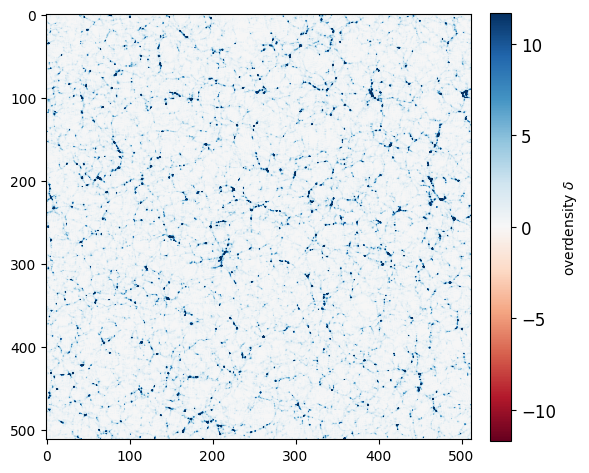

In [39]:
plotter.plot_field(pos_mesh)

0.0 1313.9601
0.0 1313.9601
(512, 512, 512)
(512, 512)


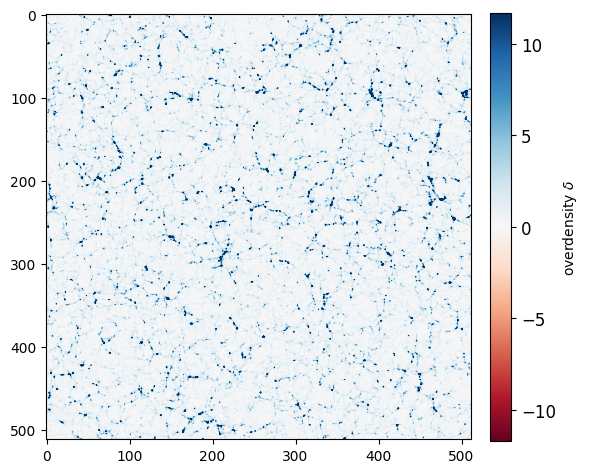

In [42]:
plotter.plot_field(pos_mesh_raw)

0.0 1313.9644
0.0 1313.9644
(512, 512, 512)
(512, 512)


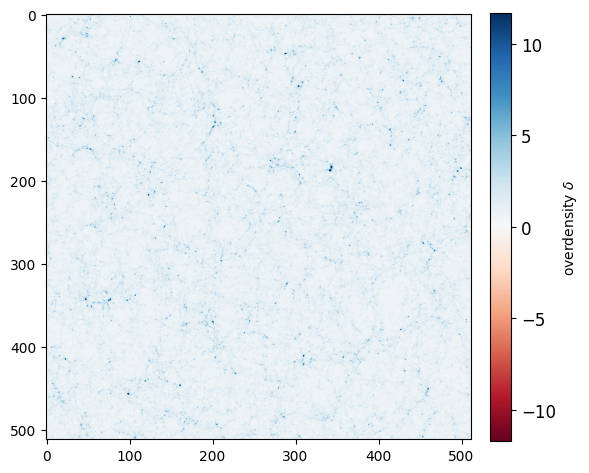

In [86]:
plotter.plot_field(pos_mesh, slice_width=100)
b

0.0 1313.9601
0.0 1313.9601
(512, 512, 512)
(512, 512)


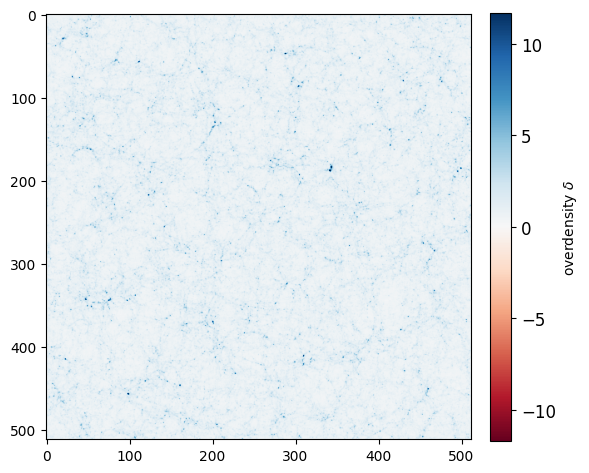

In [87]:
plotter.plot_field(pos_mesh_raw, slice_width=100)


/tmp/ipykernel_446993/612561370.py:1: RuntimeWarning: divide by zero encountered in divide
  plotter.plot_field((pos_mesh - pos_mesh_raw)/pos_mesh_raw,
/tmp/ipykernel_446993/612561370.py:1: RuntimeWarning: invalid value encountered in divide
  plotter.plot_field((pos_mesh - pos_mesh_raw)/pos_mesh_raw,


nan nan
nan nan
(512, 512, 512)
(512, 512)


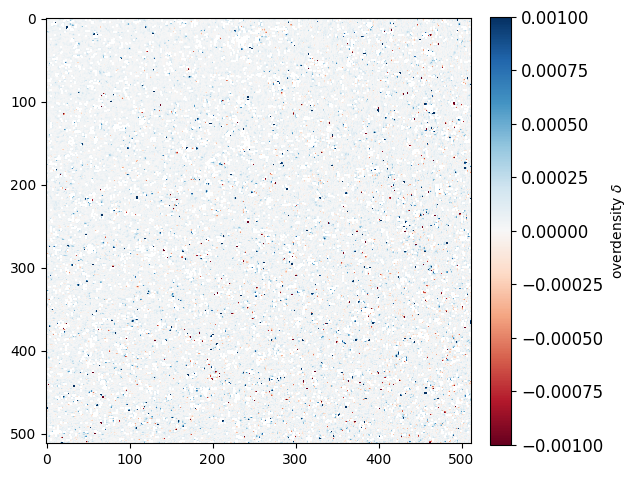

In [65]:
plotter.plot_field((pos_mesh - pos_mesh_raw)/pos_mesh_raw,
                    vmin=-0.001, vmax=0.001)

In [23]:
print(pos)

[[996.92444     1.5748159 996.855    ]
 [996.7765      1.5275565 996.8047   ]
 [997.63135     1.0584303 996.8048   ]
 ...
 [998.09515   997.75214   990.3077   ]
 [997.72437   997.37787   989.8274   ]
 [997.39526   999.7056    993.18774  ]]


In [24]:
print(pos_raw)

[[996.9244      1.5748158 996.8549   ]
 [996.7764      1.5275565 996.8046   ]
 [997.6313      1.0584303 996.80475  ]
 ...
 [998.09515   997.7521    990.3076   ]
 [997.7243    997.3778    989.8274   ]
 [997.3952    999.70557   993.1877   ]]


In [58]:
diff = pos - pos_raw

In [97]:
diff = (diff + box_size / 2) % box_size - box_size / 2

In [98]:
dists = np.sqrt(np.sum(diff**2, axis=-1))

In [99]:
i_sort = np.argsort(dists)

In [100]:
i_sort

array([ 67108863,  53262042,  53262043, ..., 129270347, 110639286,
       110638773])

In [101]:
print(pos[i_sort[0]], pos_raw[i_sort[0]])
print(pos[i_sort[len(i_sort)//2]], pos_raw[i_sort[[len(i_sort)//2]]])
print(pos[i_sort[-1]], pos_raw[i_sort[-1]])

[4.9820334e+02 4.9957275e-01 9.9780096e+02] [4.9820331e+02 4.9960250e-01 9.9780096e+02]
[926.81537  83.55701 713.66284] [[888.76154 389.57217 461.16562]]
[833.586    57.50523 353.72565] [735.69855 556.63727 853.028  ]


In [102]:
diff

array([[6.1035156e-05, 0.0000000e+00, 6.1035156e-05],
       [6.1035156e-05, 0.0000000e+00, 6.1035156e-05],
       [6.1035156e-05, 0.0000000e+00, 6.1035156e-05],
       ...,
       [0.0000000e+00, 6.1035156e-05, 6.1035156e-05],
       [6.1035156e-05, 6.1035156e-05, 0.0000000e+00],
       [6.1035156e-05, 6.1035156e-05, 6.1035156e-05]], dtype=float32)

In [103]:
dists

array([8.6316744e-05, 8.6316744e-05, 8.6316744e-05, ..., 8.6316744e-05,
       8.6316744e-05, 1.0571599e-04], dtype=float32)

In [104]:
np.min(dists), np.max(dists), np.mean(dists)

(0.0, 712.75354, 387.66345)

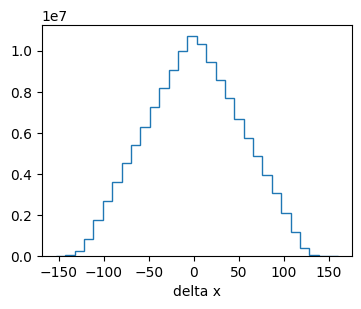

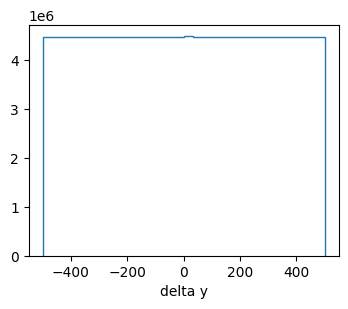

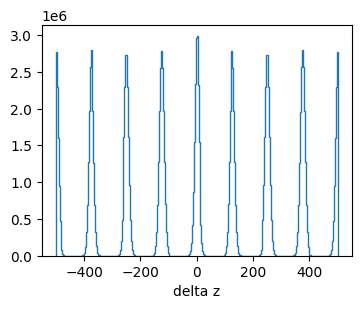

In [105]:
labels = ['x', 'y', 'z']
for i in range(3):
    plt.figure(figsize=(4,3))
    if labels[i] == 'z':
        bins = 300
    else:
        bins = 30
    plt.hist(diff[:,i], bins=bins, histtype='step')
    plt.xlabel(f'delta {labels[i]}')

(array([  744937.,   777359.,   749450.,   728222.,  1151626.,  4565720.,
         3476507.,  3025206.,  2880918.,  2884570.,  6992082.,  6776363.,
         5644245.,  5139813.,  4904270.,  8207436., 10541491.,  8346741.,
         7545706.,  7151422.,  8854718.,  9323811.,  6214090.,  5136275.,
         3629454.,  3430541.,  2196958.,  1228447.,  1172271.,   797079.]),
 array([  0.        ,  23.75845146,  47.51690292,  71.27535248,
         95.03380585, 118.79225922, 142.55070496, 166.30915833,
        190.06761169, 213.82606506, 237.58451843, 261.34295654,
        285.10140991, 308.85986328, 332.61831665, 356.37677002,
        380.13522339, 403.89367676, 427.65213013, 451.4105835 ,
        475.16903687, 498.92749023, 522.68591309, 546.44439697,
        570.20281982, 593.96130371, 617.71972656, 641.47821045,
        665.2366333 , 688.99511719, 712.75354004]),
 [<matplotlib.patches.Polygon at 0x2afb2883fb90>])

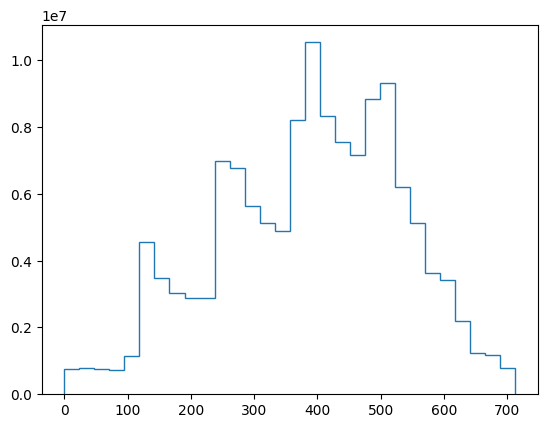

In [106]:
plt.hist(dists, bins=30, histtype='step')

In [67]:
diffs_mesh = (pos_mesh - pos_mesh_raw).flatten()

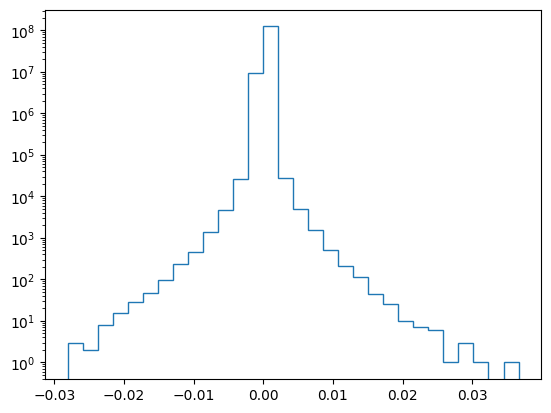

In [68]:
plt.hist(diffs_mesh, bins=30, histtype='step')
plt.yscale('log')